In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
len(coordinates)

1500

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

602

In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | atuona
Processing Record 2 of Set 1 | hilo
Processing Record 3 of Set 1 | hoquiam
Processing Record 4 of Set 1 | esperance
Processing Record 5 of Set 1 | port alfred
Processing Record 6 of Set 1 | tasiilaq
Processing Record 7 of Set 1 | kawana waters
City not found. Skipping...
Processing Record 8 of Set 1 | carnarvon
Processing Record 9 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | mocambique
City not found. Skipping...
Processing Record 12 of Set 1 | sobolevo
Processing Record 13 of Set 1 | hithadhoo
Processing Record 14 of Set 1 | mao
Processing Record 15 of Set 1 | balykshi
Processing Record 16 of Set 1 | bambous virieux
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | pitimbu
Processing Record 19 of Set 1 | ganzhou
Processing Record 20 of Set 1 | tiksi
Processing Record 21 of Set 1 | kapaa
Pro

Processing Record 35 of Set 4 | isangel
Processing Record 36 of Set 4 | viransehir
Processing Record 37 of Set 4 | moussoro
Processing Record 38 of Set 4 | vila velha
Processing Record 39 of Set 4 | lira
Processing Record 40 of Set 4 | saint george
Processing Record 41 of Set 4 | fez
Processing Record 42 of Set 4 | kieta
Processing Record 43 of Set 4 | jawhar
Processing Record 44 of Set 4 | buala
Processing Record 45 of Set 4 | ixtapa
Processing Record 46 of Set 4 | volosovo
Processing Record 47 of Set 4 | conceicao da barra
Processing Record 48 of Set 4 | canutama
Processing Record 49 of Set 4 | akdepe
Processing Record 50 of Set 4 | elban
Processing Record 1 of Set 5 | batemans bay
Processing Record 2 of Set 5 | east london
Processing Record 3 of Set 5 | vardo
Processing Record 4 of Set 5 | stralsund
Processing Record 5 of Set 5 | tual
Processing Record 6 of Set 5 | rio grande
Processing Record 7 of Set 5 | bethel
Processing Record 8 of Set 5 | gushi
Processing Record 9 of Set 5 | ak

Processing Record 25 of Set 8 | hvolsvollur
Processing Record 26 of Set 8 | lorengau
Processing Record 27 of Set 8 | coahuayana
Processing Record 28 of Set 8 | batagay-alyta
Processing Record 29 of Set 8 | bosaso
Processing Record 30 of Set 8 | marzuq
Processing Record 31 of Set 8 | dwarka
Processing Record 32 of Set 8 | manggar
Processing Record 33 of Set 8 | isla vista
Processing Record 34 of Set 8 | asmara
Processing Record 35 of Set 8 | lodwar
Processing Record 36 of Set 8 | puerto del rosario
Processing Record 37 of Set 8 | safaga
Processing Record 38 of Set 8 | sao felix do xingu
Processing Record 39 of Set 8 | whitehaven
Processing Record 40 of Set 8 | karangampel
Processing Record 41 of Set 8 | diamantino
Processing Record 42 of Set 8 | zemio
Processing Record 43 of Set 8 | aden
Processing Record 44 of Set 8 | ligayan
Processing Record 45 of Set 8 | ossora
Processing Record 46 of Set 8 | kaeo
Processing Record 47 of Set 8 | anse-bertrand
Processing Record 48 of Set 8 | san cris

Processing Record 12 of Set 12 | chanderi
Processing Record 13 of Set 12 | laje
Processing Record 14 of Set 12 | leshukonskoye
Processing Record 15 of Set 12 | beloha
Processing Record 16 of Set 12 | nyurba
Processing Record 17 of Set 12 | xining
Processing Record 18 of Set 12 | vila
Processing Record 19 of Set 12 | pafos
Processing Record 20 of Set 12 | pindiga
Processing Record 21 of Set 12 | la ronge
Processing Record 22 of Set 12 | goundam
Processing Record 23 of Set 12 | bubaque
Processing Record 24 of Set 12 | la palma
Processing Record 25 of Set 12 | vostok
Processing Record 26 of Set 12 | lakatoro
Processing Record 27 of Set 12 | oussouye
Processing Record 28 of Set 12 | ocos
Processing Record 29 of Set 12 | tarauaca
Processing Record 30 of Set 12 | noyabrsk
Processing Record 31 of Set 12 | butembo
Processing Record 32 of Set 12 | bontang
Processing Record 33 of Set 12 | eirunepe
Processing Record 34 of Set 12 | la plaine
Processing Record 35 of Set 12 | deputatskiy
Processing 

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Atuona,-9.8000,-139.0333,78.37,77,25,15.90,PF,2022-02-05 02:27:52
1,Hilo,19.7297,-155.0900,78.53,80,20,8.05,US,2022-02-05 02:27:52
2,Hoquiam,46.9809,-123.8893,48.52,93,100,14.97,US,2022-02-05 02:27:53
3,Esperance,-33.8667,121.9000,85.84,47,3,9.15,AU,2022-02-05 02:27:54
4,Port Alfred,-33.5906,26.8910,68.86,81,94,8.63,ZA,2022-02-05 02:24:48
5,Tasiilaq,65.6145,-37.6368,23.16,69,100,42.73,GL,2022-02-05 02:26:04
6,Carnarvon,-24.8667,113.6333,104.07,16,11,12.66,AU,2022-02-05 02:27:55
7,Busselton,-33.6500,115.3333,97.05,30,14,6.62,AU,2022-02-05 02:27:56
8,Sobolevo,54.4299,31.8996,-1.08,100,100,6.44,RU,2022-02-05 02:27:57
9,Hithadhoo,-0.6000,73.0833,81.66,73,99,11.43,MV,2022-02-05 02:27:58


In [10]:
city_data_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[city_data_order]

In [13]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Atuona,PF,2022-02-05 02:27:52,-9.8000,-139.0333,78.37,77,25,15.90
1,Hilo,US,2022-02-05 02:27:52,19.7297,-155.0900,78.53,80,20,8.05
2,Hoquiam,US,2022-02-05 02:27:53,46.9809,-123.8893,48.52,93,100,14.97
3,Esperance,AU,2022-02-05 02:27:54,-33.8667,121.9000,85.84,47,3,9.15
4,Port Alfred,ZA,2022-02-05 02:24:48,-33.5906,26.8910,68.86,81,94,8.63
5,Tasiilaq,GL,2022-02-05 02:26:04,65.6145,-37.6368,23.16,69,100,42.73
6,Carnarvon,AU,2022-02-05 02:27:55,-24.8667,113.6333,104.07,16,11,12.66
7,Busselton,AU,2022-02-05 02:27:56,-33.6500,115.3333,97.05,30,14,6.62
8,Sobolevo,RU,2022-02-05 02:27:57,54.4299,31.8996,-1.08,100,100,6.44
9,Hithadhoo,MV,2022-02-05 02:27:58,-0.6000,73.0833,81.66,73,99,11.43


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

<function matplotlib.pyplot.show(close=None, block=None)>

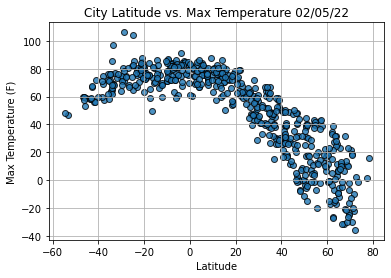

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show

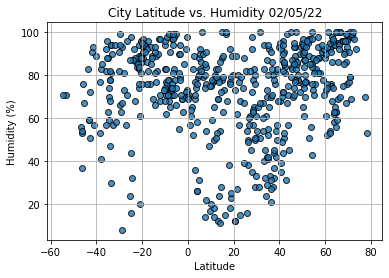

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

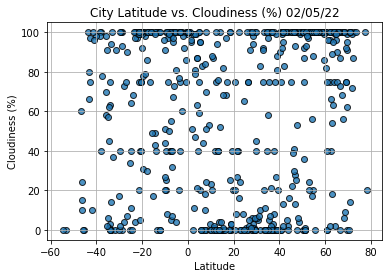

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

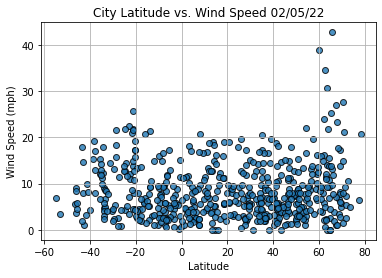

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()